**Structured data:**

    Lets consider heart disease data in that columns under X were features and on the basis of features we were predicting target variable

# Predicting Heart Disease Using ML

We will follow:
1. Problem Defination
2. Data
3. Evaluation
4. Features Extraction
5. Modelling
6. Experimentation

## 1.Problem Defination

In a statement, predictinhg heart Disease


## 2.Data is Already Collected


## 3.Evaluation

>If we can reach 95% accuracy we will persue the project

## 4. Features

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target-have disease or not**

## Preparing the tools


In [121]:
# Importing the tools

# Regular EDA( EXPLORATORY DATA Analysis )
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score

#### Load Data

In [2]:
df=pd.read_csv("heart-disease-1.csv")
df.shape

(303, 14)

#### EDA

The goal here is to know more about data and become a subject matter on dataset

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

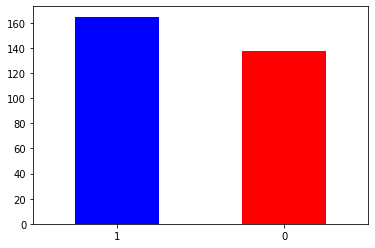

In [6]:
df["target"].value_counts().plot(kind="bar",color=["blue","red"]);
plt.xticks(rotation=0);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [9]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Comparing target with sex

pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


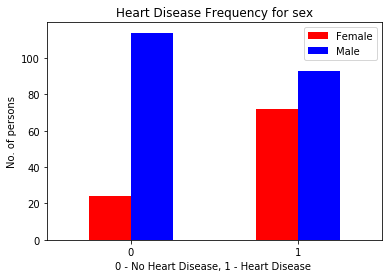

In [11]:
# Creating plot of crosstab
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",color=["red","blue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 - No Heart Disease, 1 - Heart Disease ")
plt.ylabel("No. of persons")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [12]:
df["thalach"].value_counts()

# thalach is **(max heart rate)**
# Here bar would not be the right rep. as there are91 diff. values
# So trying scatter plot

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

**Plottting scatter plot b/w age and thalach for both positive & negative**

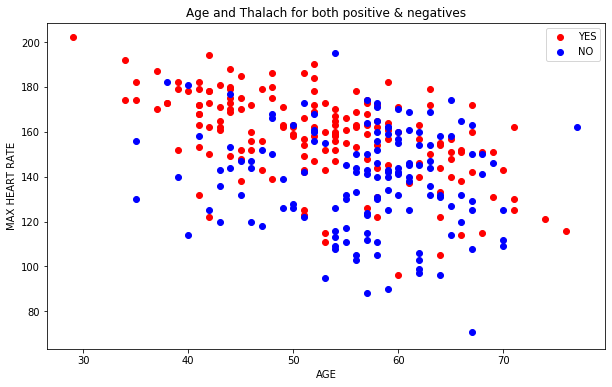

In [31]:
# For positives
plt.figure(figsize=(10,6))
plt.scatter(df.age[df["target"]==1],df.thalach[df["target"]==1],c="red")
plt.xlabel("AGE")
plt.ylabel("MAX HEART RATE")
plt.title("Age and Thalach for both positive & negatives");

# For negatives
plt.scatter(df.age[df["target"]==0],df.thalach[df["target"]==0],c="blue");

plt.legend(["YES","NO"]);

**Distribution of age with a histogram**

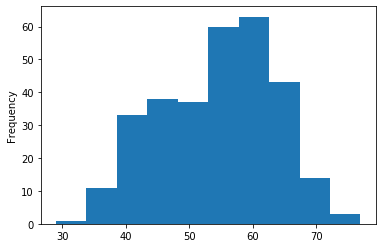

In [38]:
df["age"].plot.hist();

**Heart Disease Frequency per chest pain type**

cp: chest pain type

-- Value 0: typical angina

-- Value 1: atypical angina

-- Value 2: non-anginal pain

-- Value 3: asymptomatic

In [56]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


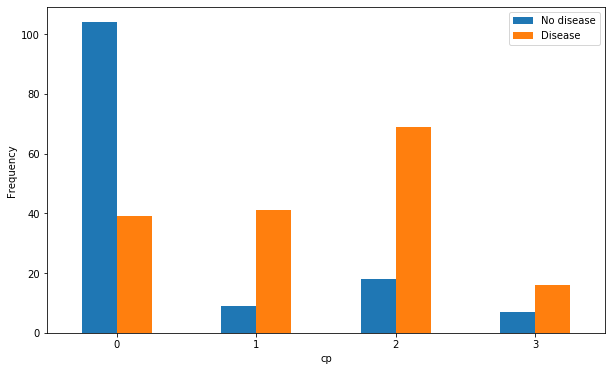

In [58]:
# Making crosstab more visual

pd.crosstab(df["cp"],df["target"]).plot(kind="bar",figsize=(10,6))
plt.xticks(rotation=0)
plt.legend(["No disease","Disease"])
plt.ylabel("Frequency");

In [43]:
# Building a corelation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


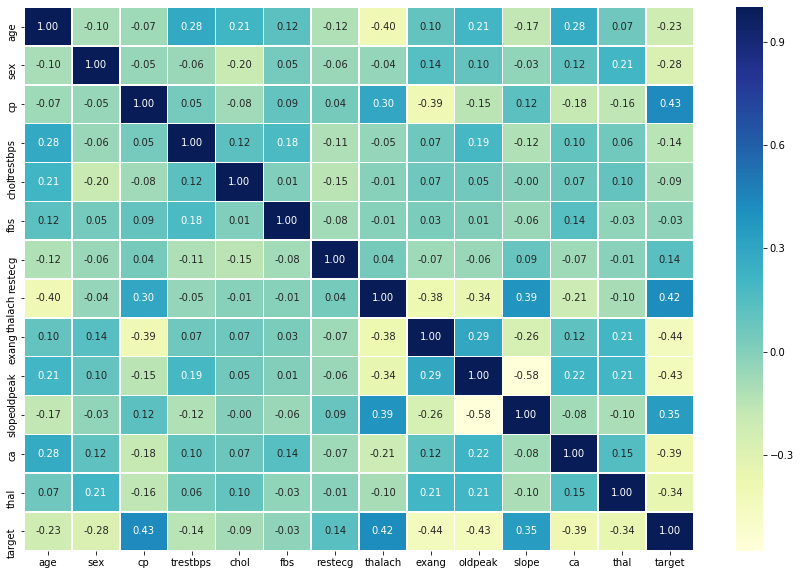

In [54]:
# Trying to visualize heatmap of this correlation matrix
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5);

**Here we can predict that for ex if we consider `cp` for it its value in target column is 0.43 which indicates that if value of cp increases the traget column calue also tends to 1 and we can see it in our above bar graph also.
If some value havs -ve cor with target that means both are inversely prop..**

## 5. Modelling

In [149]:
# Making Feature variables and target variable

x=df.drop("target",axis=1)
y=df["target"]
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [195]:
# Splitting data in training and test set
np.random.seed(5)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



**NOW ITS THE TIME TO CHOOSE RIGHT MODEL**
1. LOGISTIC REGRESSION
2. K-NEAREST NEIGHBOURS
3. RANDOM FOREST CLASSIFIER

In [61]:
# Put models in a dictionary
models= {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

# Create a function
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate the model
    """
    # set random seed
    np.random.seed(6)
    
    # Making a dict to keep model scores
    model_scores={}
    
    # Loop through models
    for name,model in models.items():
        
        # Fitting the model to the data
        model.fit(x_train,y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [62]:
model_scores=fit_and_score(models=models,x_train=x_train,
                          x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

In [74]:
pd.DataFrame(model_scores,index=["Accuracy"]).T

,Accuracy
Logistic Regression,0.901639
KNN,0.639344
Random Forest,0.885246


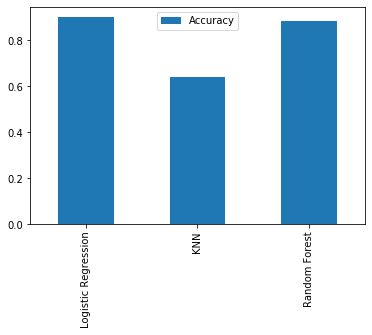

In [72]:
pd.DataFrame(model_scores,index=["Accuracy"]).T.plot(kind="bar");

Now we got the results of our base line models so now its the time to tune our model:
* Hyperparameter Tuning
* Feature Importance
* Confusion matrix
* Cross Validation
* Precison
* Recall
* F1- Score
* Classification Report
* ROC Curve
* Area Under The curve (AUC)

## Hyperparameter Tuning by hand

In [77]:
# Tuning KNN

train_scores=[]
test_scores=[]

# Create a list of different values of KNN
neighbours=range(1,21)

# Set up knn instance
knn=KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))



In [80]:
train_scores

[1.0,
 0.7933884297520661,
 0.7644628099173554,
 0.7644628099173554,
 0.768595041322314,
 0.7644628099173554,
 0.7396694214876033,
 0.7231404958677686,
 0.7024793388429752,
 0.6776859504132231,
 0.7066115702479339,
 0.6818181818181818,
 0.71900826446281,
 0.6818181818181818,
 0.6942148760330579,
 0.6694214876033058,
 0.7148760330578512,
 0.6859504132231405,
 0.7024793388429752,
 0.6983471074380165]

In [81]:
test_scores

[0.5901639344262295,
 0.6229508196721312,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6229508196721312,
 0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082]

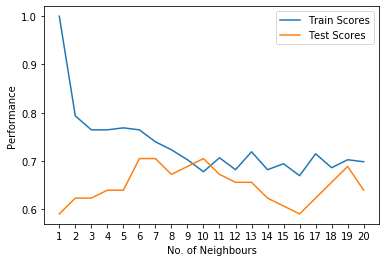

In [88]:
plt.plot(neighbours,train_scores,label="Train_Scores")
plt.plot(neighbours,test_scores,label="Test_Scores")
plt.xlabel("No. of Neighbours")
plt.ylabel("Performance");
plt.xticks(np.arange(1,21,1))
plt.legend(["Train Scores","Test Scores"]);

In [87]:
print(f"Maximum KNN score is {max(test_scores)*100:.2f}%")

Maximum KNN score is 70.49%


**We can conclude that after hyperparameter tuning also there is an increase of only 5-6 % increase in accuracy and which is far less than other 2 models**

### Hyper parameter Tuning using RandomizedSerachCV
We are going to tune:
* Logistic Regression
* KNN

..... Using RandomizedSearchCV

In [98]:
# Create a hyperparameter grid using Logistic Regression

log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# Create a hyperparameter grid using Random Forest

rf_grid={"n_estimators":np.arange(10,100,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}
 

In [94]:
np.random.seed(23)

# Setting up hyperparemeter search for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
# Fitting random hyperparametr search mode
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [95]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [96]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

**Now Random Forest Classifier**

In [99]:
np.random.seed(53)

# Setting up hyperparemeter search for Logistic Regression
rf_log_reg=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
# Fitting random hyperparametr search mode
rf_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [100]:
rf_log_reg.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 13,
 'max_depth': 10}

In [101]:
rf_log_reg.score(x_test,y_test)

0.8852459016393442

### Hyper parameter Tuning using GridSerachCV

* Logistic One
* Random One

**Logistic**

In [102]:
# Create a hyperparameter grid using Logistic Regression

log_reg_grid1={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}
 

In [103]:
grid_ls=GridSearchCV(LogisticRegression(),
                    param_grid=log_reg_grid1,
                    cv=5,
                    verbose=True)
grid_ls.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [104]:
grid_ls.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [105]:
grid_ls.score(x_test,y_test)

0.8852459016393442

**After tuning our model we can say that that before tuning or initially only our model performed best as it gave an accuracy of around 90%**

In [108]:
model_scores

{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

## Evaluation our tuned machine learning model classifier, beyond
* ROC CURVE AND AUC SCORE
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-Score

**Let's evaluate all the parameters metrics on logistic regression's base model**

In [129]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9016393442622951

In [203]:
# Making predictions with base model
y_preds=model.predict(x_test)
y_preds

NotFittedError: This LogisticRegression instance is not fitted yet

In [116]:
def plot_roc_curve(fpr,tpr):
    """
    PLOTS A  ROC BTWEEN TPR AND FPR
    
    """
    # plots roc curve
    plt.plot(fpr,tpr,color="orange",label='ROC')
    
    #PLOT LINE WITH NO PREDICTIVE POWER(BASELINE)
    plt.plot([0,1],[0,1], color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plots
    plt.xlabel("False Positive Rates (fpr)")
    plt.ylabel("True Positive Rates (tpr)")
    plt.title("ROC (Reciever Operating Characteristic) Curve")
    plt.legend()
    plt.show()

In [118]:
# Creating ROC Curuve

y_proba=model.predict_proba(x_test)
y_proba[:4]

array([[0.08987505, 0.91012495],
       [0.9934983 , 0.0065017 ],
       [0.99262772, 0.00737228],
       [0.78580059, 0.21419941]])

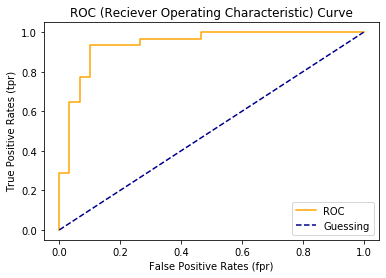

The area under ROC curve is: 0.94


In [133]:
fpr,tpr,threshold=roc_curve(y_test,y_proba[:,1])
plot_roc_curve(fpr,tpr)
print(f"The area under ROC curve is: {roc_auc_score(y_test,y_proba[:,1]):.2f}")

**Confusion matrix**

In [134]:
confusion_matrix(y_test,y_preds)

array([[26,  4],
       [ 2, 29]], dtype=int64)

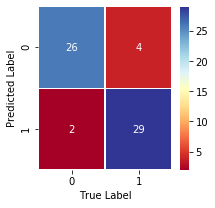

In [141]:
def conf_mat_graph(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   linewidths=0.5,
                   cmap="RdYlBu")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
conf_mat_graph(y_test,y_preds)
# YlGnBu,
    

In [144]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.88      0.94      0.91        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## Calculating evaluation metrics using cross validation

In [151]:
# Cross-validated accuracy
cv_acc=cross_val_score(model,x,y,cv=5,scoring="accuracy")
cv_acc

C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [152]:
# Accuracy of cross val array
cv_acc=np.mean(cv_acc)
cv_acc

0.8215300546448088

In [153]:
# Cross-validated precision
cv_pre=cross_val_score(model,x,y,cv=5,scoring="precision")
np.mean(cv_pre)

C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

0.817900063251107

In [154]:
# Cross-validated reacall
cv_reca=cross_val_score(model,x,y,cv=5,scoring="recall")
np.mean(cv_reca)

C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

0.8727272727272727

In [156]:
# Cross-validated f1 score
cv_f1=cross_val_score(model,x,y,cv=5,scoring="f1")
np.mean(cv_f1)

C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mayank Rathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

0.8431741323998502

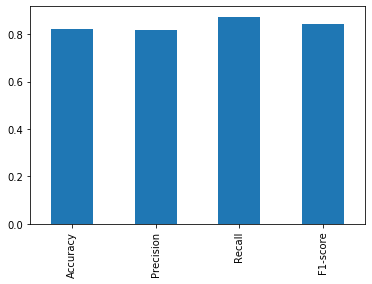

In [181]:
cv_metrics=pd.DataFrame({"Accuracy":np.mean(cv_acc),
                        "Precision":np.mean(cv_pre),
                        "Recall":np.mean(cv_reca),
                        "F1-score":np.mean(cv_f1)},index=[0])
cv_metrics.T.plot(kind="bar",legend=False);

### Feature Importance

Feature Importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute "

Finding feature importance is each for different ml models

In [182]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Lets find feature importance**

In [183]:
# Fit an instance of Logistic Regression
clf=LogisticRegression(C=2.592943797404667, solver='liblinear')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.8852459016393442

In [186]:
# Check Coeff

clf.coef_

# This gives us the idea how each column contribute to target column

array([[ 0.00896083, -1.73746198,  0.7929584 , -0.01796632, -0.00582214,
         0.03780531,  0.59280552,  0.03503721, -0.93355131, -0.38982348,
         0.47684734, -0.71045736, -0.77529696]])

In [1]:
# Match coef's to features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

NameError: name 'df' is not defined

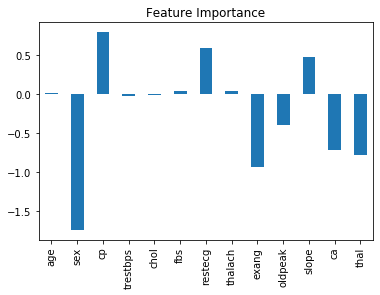

In [192]:
# Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance");